In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Flatten


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
print(train_images[0], train_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
import matplotlib.pyplot as plt

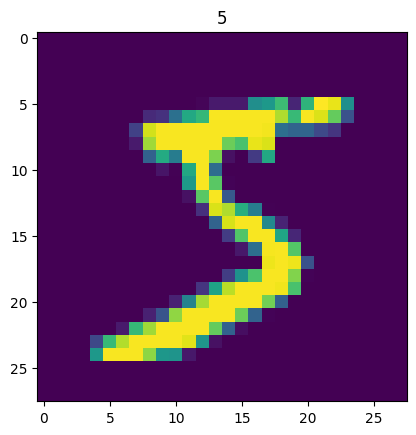

In [10]:
plt.title(f"{train_labels[0]}")
plt.imshow(train_images[0])
plt.show()

In [11]:
print(train_labels)

[5 0 4 ... 5 6 8]


In [12]:
import numpy as np

In [13]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [15]:
model = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(784, activation = "relu"),
    Dense(128, activation = "relu"),
    Dense(10)
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 717,210
Trainable params: 717,210
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              optimizer = keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ["accuracy"])

In [21]:
history = model.fit(train_images, train_labels, batch_size = 32, epochs = 20, verbose = True)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0723 - accuracy: 0.9842
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0729 - accuracy: 0.9856
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0748 - accuracy: 0.9852
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0652 - accuracy: 0.9852
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0690 - accuracy: 0.9861
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0650 - accuracy: 0.9878
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0632 - accuracy: 0.9864
Epoch 8/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0722 - accuracy: 0.9855
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0792 - accuracy: 0.9855
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.073

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

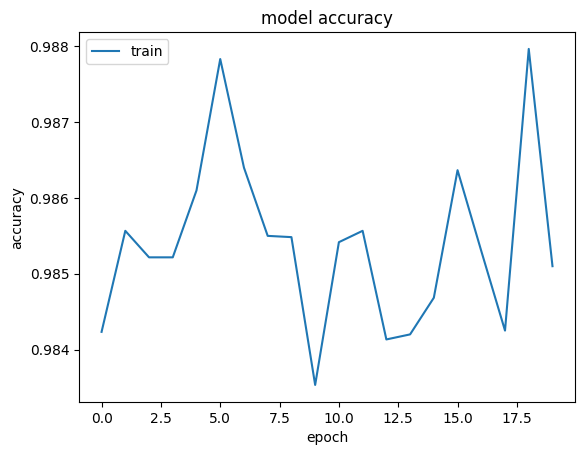

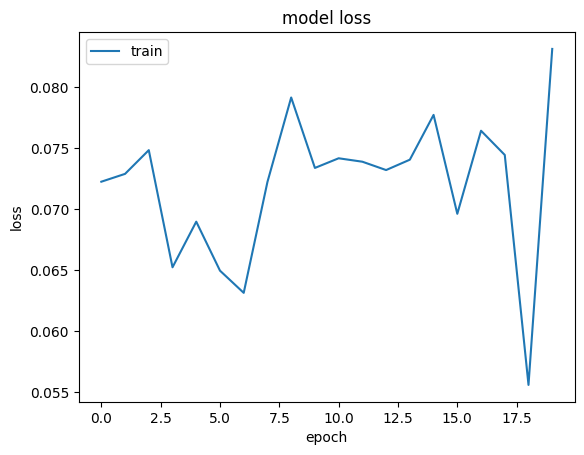

In [25]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
test_history = model.evaluate(test_images, test_labels, batch_size = 8)

1250/1250 [==============================] - 3s 3ms/step - loss: 0.4460 - accuracy: 0.9594


In [29]:
test_history

[0.44603878259658813, 0.9593999981880188]